In [2]:
#import packages and load data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('AirPassengers.csv')

In [5]:
data.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [6]:
data.dtypes

Month          object
#Passengers     int64
dtype: object

In [7]:
data['Month']=pd.to_datetime(data['Month'], format='%Y-%m')

In [8]:
from pandas import to_datetime
data.columns=['ds','y']
data['ds']=to_datetime(data['ds'])

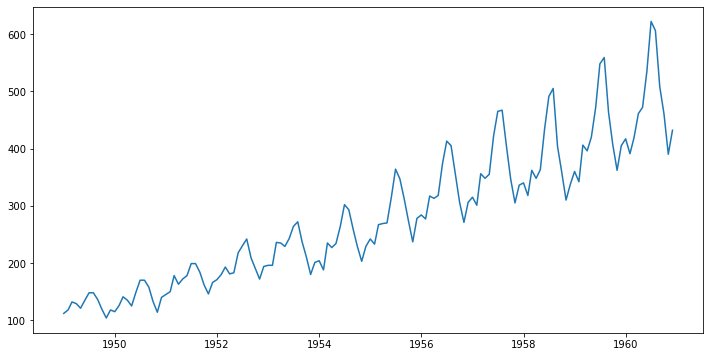

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data.set_index(['ds']))

In [10]:
#flit the model

In [11]:
from fbprophet import Prophet

In [12]:
model=Prophet()

In [13]:
model.fit(data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
#making future predictions

In [15]:
future_prediction=model.make_future_dataframe(periods=365,freq="D")

In [16]:
future_prediction.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [17]:
forecast=model.predict(future_prediction)

In [18]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.320611,55.099607,113.501483,106.320611,106.320611,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,-21.941934,0.0,0.0,0.0,84.378677
1,1949-02-01,108.500995,47.552202,108.892741,108.500995,108.500995,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,-30.714169,0.0,0.0,0.0,77.786826
2,1949-03-01,110.470374,80.953646,140.272963,110.470374,110.470374,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,-0.475833,0.0,0.0,0.0,109.994541
3,1949-04-01,112.650758,78.156902,137.375033,112.650758,112.650758,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,-5.203855,0.0,0.0,0.0,107.446903
4,1949-05-01,114.760808,81.539900,139.475465,114.760808,114.760808,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,-3.825854,0.0,0.0,0.0,110.934953


In [19]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds        yhat  yhat_lower  yhat_upper
0 1949-01-01   84.378677   55.099607  113.501483
1 1949-02-01   77.786826   47.552202  108.892741
2 1949-03-01  109.994541   80.953646  140.272963
3 1949-04-01  107.446903   78.156902  137.375033
4 1949-05-01  110.934953   81.539900  139.475465


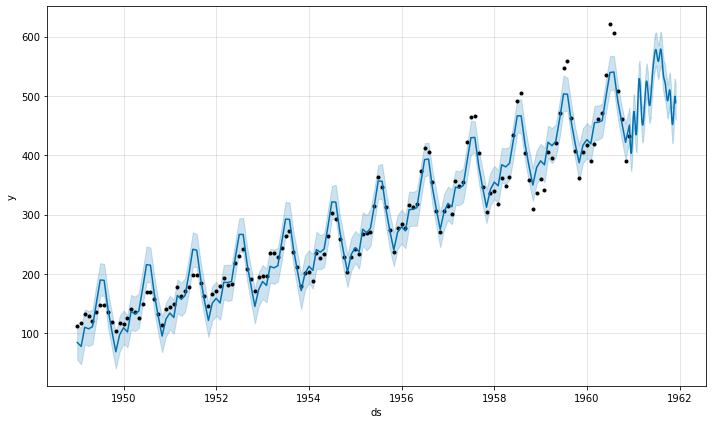

In [20]:
model.plot(forecast)
plt.show()

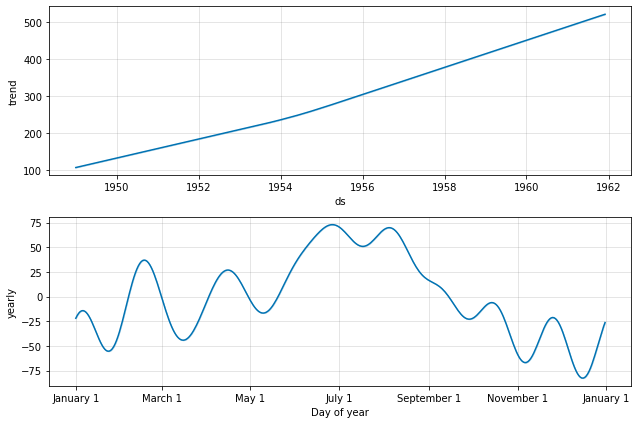

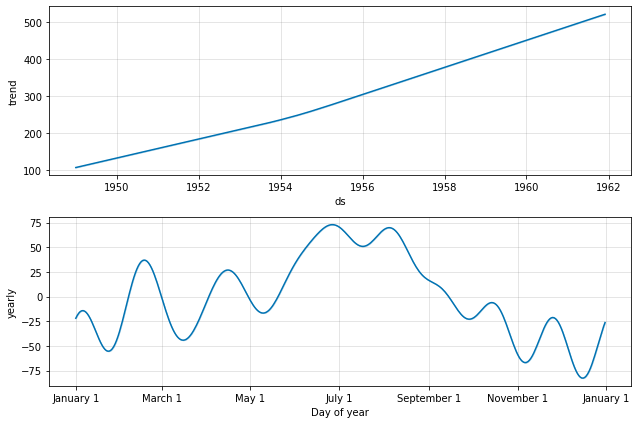

In [21]:
model.plot_components(forecast)

In [22]:
from fbprophet.diagnostics import cross_validation

In [23]:
cv=cross_validation(model,initial='530 days',period='180 days',horizon='365 days')
cv

INFO:fbprophet:Making 20 forecasts with cutoffs between 1950-07-22 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/20 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1950-08-01,139.839784,139.792412,139.896234,170,1950-07-22
1,1950-09-01,159.165459,158.990781,159.352231,158,1950-07-22
2,1950-10-01,144.442711,144.099281,144.819654,133,1950-07-22
3,1950-11-01,77.628694,77.041308,78.213697,114,1950-07-22
4,1950-12-01,158.918801,158.106842,159.714952,140,1950-07-22
...,...,...,...,...,...,...
235,1960-08-01,527.079522,501.580496,553.550964,606,1959-12-02
236,1960-09-01,485.869209,461.601023,512.973910,508,1959-12-02
237,1960-10-01,452.202363,425.127961,479.112707,461,1959-12-02
238,1960-11-01,422.372655,395.618479,448.923583,390,1959-12-02


In [24]:
#evolution of the model

In [25]:
from fbprophet.diagnostics import performance_metrics


In [26]:
pm=performance_metrics(cv)

In [27]:
pm.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,41 days,1033.442083,32.147194,25.009051,0.079593,0.073811,0.208333
1,42 days,966.621945,31.090544,24.495749,0.078513,0.073811,0.166667
2,46 days,989.559780,31.457269,25.324207,0.079409,0.084098,0.125000
3,47 days,959.568402,30.976901,25.065133,0.078142,0.084098,0.125000
4,48 days,957.810331,30.948511,24.867530,0.076697,0.084098,0.166667


In [28]:
#save the model

In [29]:
import pickle
pickle.dump(model,open('airpassengers.pkl','wb'))